# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 12.10.2024

Мягкий дедлайн: 23:59MSK 27.10.2024

Жесткий дедлайн: 23:59MSK 31.10.2024

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1]:
!pip install folium

In [2]:
import folium

m = folium.Map(location=(50.97178, 9.79418), zoom_start=15)

m

Если вы всё сделали правильно, то выше должна открыться карта

### 📌 **Памятка по дз2**

Обрабатывать данные можно любым способом (`polars`, `pandas`, `pyspark`, ...), который вам нравится и запускается в ноутбуке, и любой библиотекой для визуализации (`matplotlib`, `seaborn`, `plotly`, ...). Пользуйтесь на здоровье, но!

> Учтите, что `polars` всё ещё молодой и не все библиотеки его поддерживают. `sklearn` во многом уже работает, но на всякий случай не стесняйтесь пользоваться методами `pl.DataFrame.to_pandas()` или `pl.DataFrame.to_numpy()`    

> Впрочем, `pandas` тоже не лишён проблем. `sklearn` принимает `pd.DataFrame` почти везде, проблемы очень редки, но если вдруг возникнет какая-то беда с шейпами, или ещё какой-нибудь казус, а вы уверены, что всё правильно, пользуйтесь `pd.DataFrame.to_numpy()`. Это не всегда решает проблему, но часто помогает понять, что на самом деле не так. При желании можно передавать и `Iterable`, и sparse-матрицы

> Графики должны быть понятные, читаемые и пр. Консультируйтесь с памяткой из дз1 в задании на график

> Для воспроизводимости результатов не забывайте пользоваться `np.random.seed(...)`, при необходимости чистите мусор `gc.collect()`, лучше в каждой ячейке

> Все результаты должны быть получены в ноутбуке. На каждый **Вопрос** долен быть дан **Ответ** (письменно (в Markdown например) или кодом)

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]
import seaborn as sns


# import ...  # your favorite data package
# import ...  # your favorite visualization package

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [4]:
!wget  -O 'train.csv' -q 'https://www.dropbox.com/s/en5f9nhn915cnkf/_train.csv?dl=0'

In [5]:
train = pd.read_csv('train.csv')
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [6]:
train.drop(columns=['dropoff_datetime'], inplace=True)
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

Я сразу нарисовал график в логарифме, но раз потом еще раз надо, пусть тут побудет дурацкий

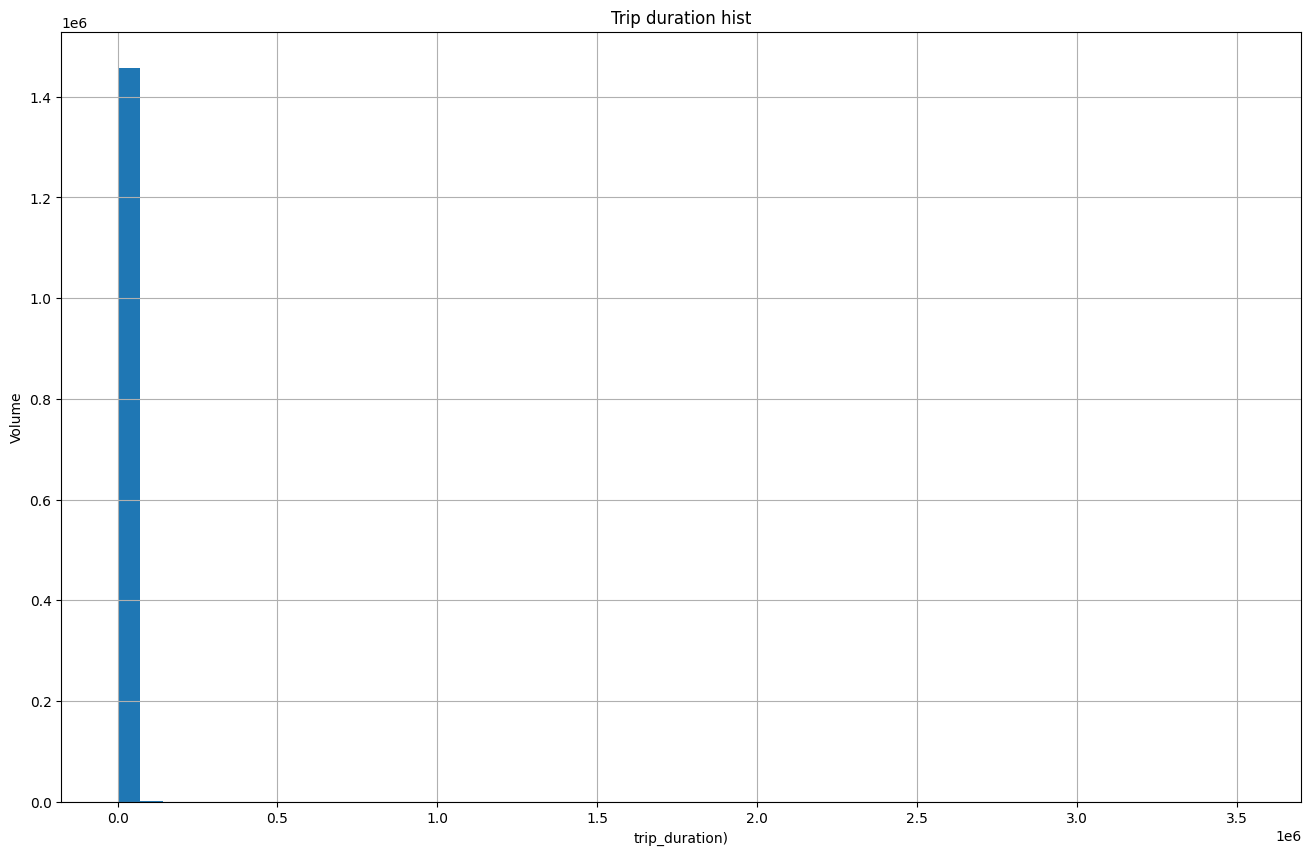

In [7]:
train['log_trip_duration'] = np.log1p(train['trip_duration'].values)
plt.hist(train['trip_duration'].values, bins=50)
plt.xlabel('trip_duration)')
plt.ylabel('Volume')
plt.title('Trip duration hist')
plt.grid()
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

Из-за выбросов некорректно отображается гистаграмма, основная часть поездок короткие (потом поймем, что по Манхэттену)

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

Нам важнее угадать порядок, чем само значение, да и разброс желательно сузить

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: $$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2} = [подставляя\  значения\ выше] = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y}_i - \hat{a}(x_i)\big)^2} $$

Куод эрат демонстрандум (нижнее и есть MSE)

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

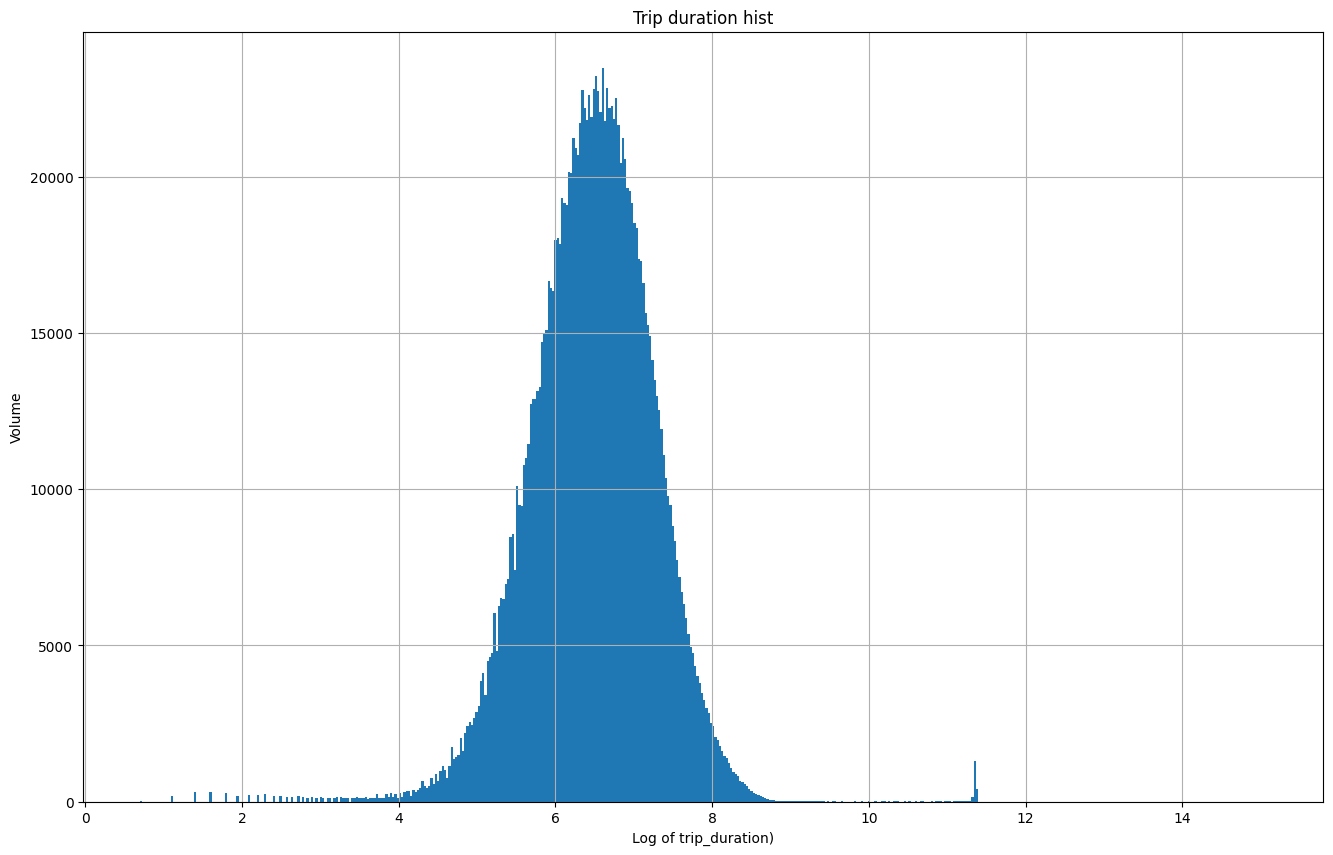

In [8]:
train.drop(columns=['trip_duration'], inplace=True)
plt.hist(train['log_trip_duration'].values, bins=500)
plt.xlabel('Log of trip_duration)')
plt.ylabel('Volume')
plt.title('Trip duration hist')
plt.grid()
plt.show()

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [9]:
def rmsle(log1p_y_true, log1p_y_pred):
    #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    return np.sqrt(np.mean((log1p_y_true - log1p_y_pred)**2))

rmsle_best_const = rmsle(train['log_trip_duration'], np.mean(train['log_trip_duration']))
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365411509


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году:

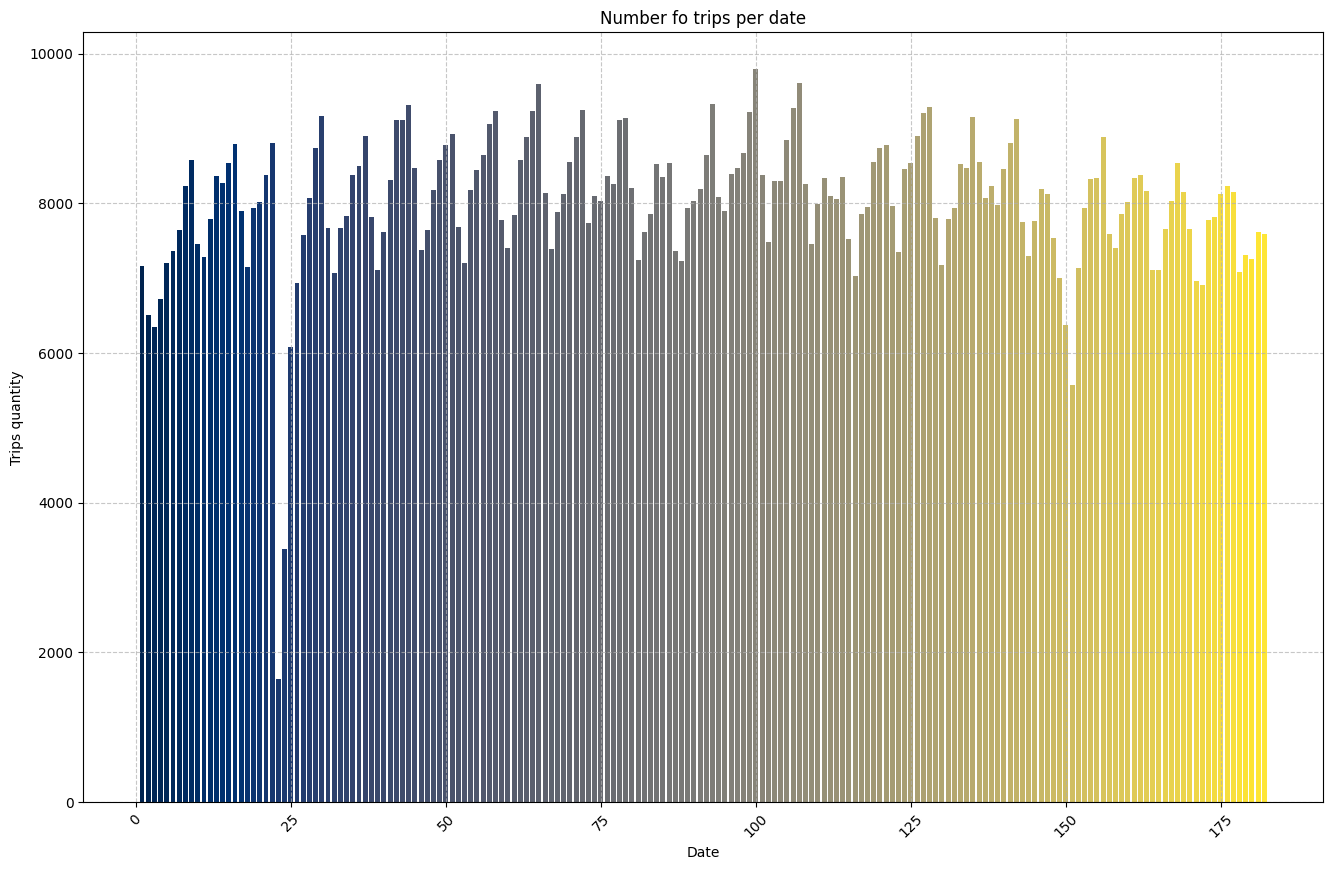

In [10]:
daily_trips = train.groupby(train['pickup_datetime'].dt.dayofyear).size()

plt.bar(daily_trips.index,daily_trips.values, color=sns.color_palette('cividis', len(daily_trips)))
plt.title('Number fo trips per date')
plt.xlabel('Date')
plt.ylabel('Trips quantity')
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках:

In [11]:
lil_days = daily_trips[daily_trips < 6000]
lil_days = pd.to_datetime(lil_days.index.astype(str) + '-2016', format='%j-%Y')
print(*lil_days.date, sep="\n")

2016-01-23
2016-01-24
2016-05-30


В эти дни были снежные бури и национальный праздник и какой-то шутинг

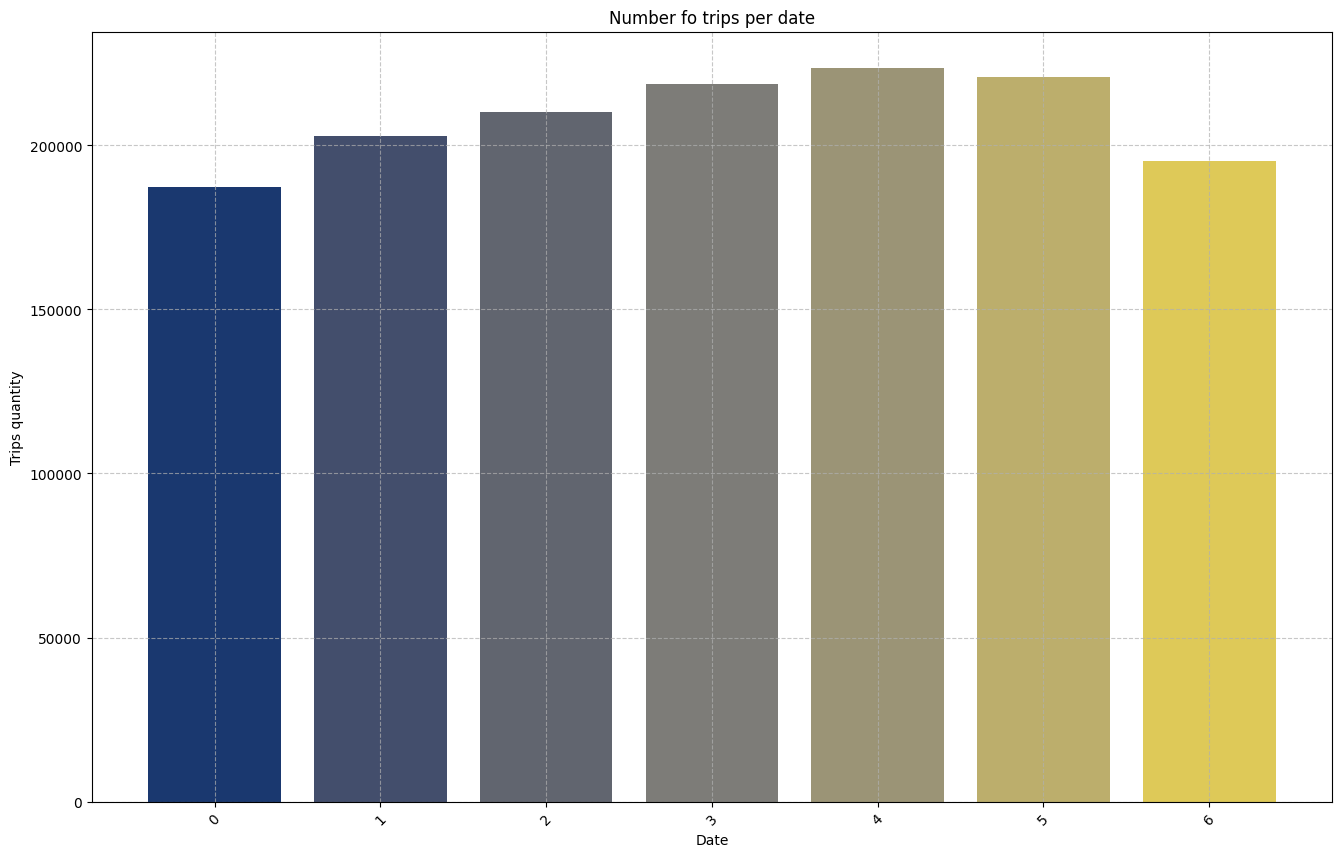

In [12]:
daily_trips = train.groupby(train['pickup_datetime'].dt.weekday).size()

plt.bar(daily_trips.index,daily_trips.values, color=sns.color_palette('cividis', len(daily_trips)))
plt.title('Number fo trips per date')
plt.xlabel('Date')
plt.ylabel('Trips quantity')
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

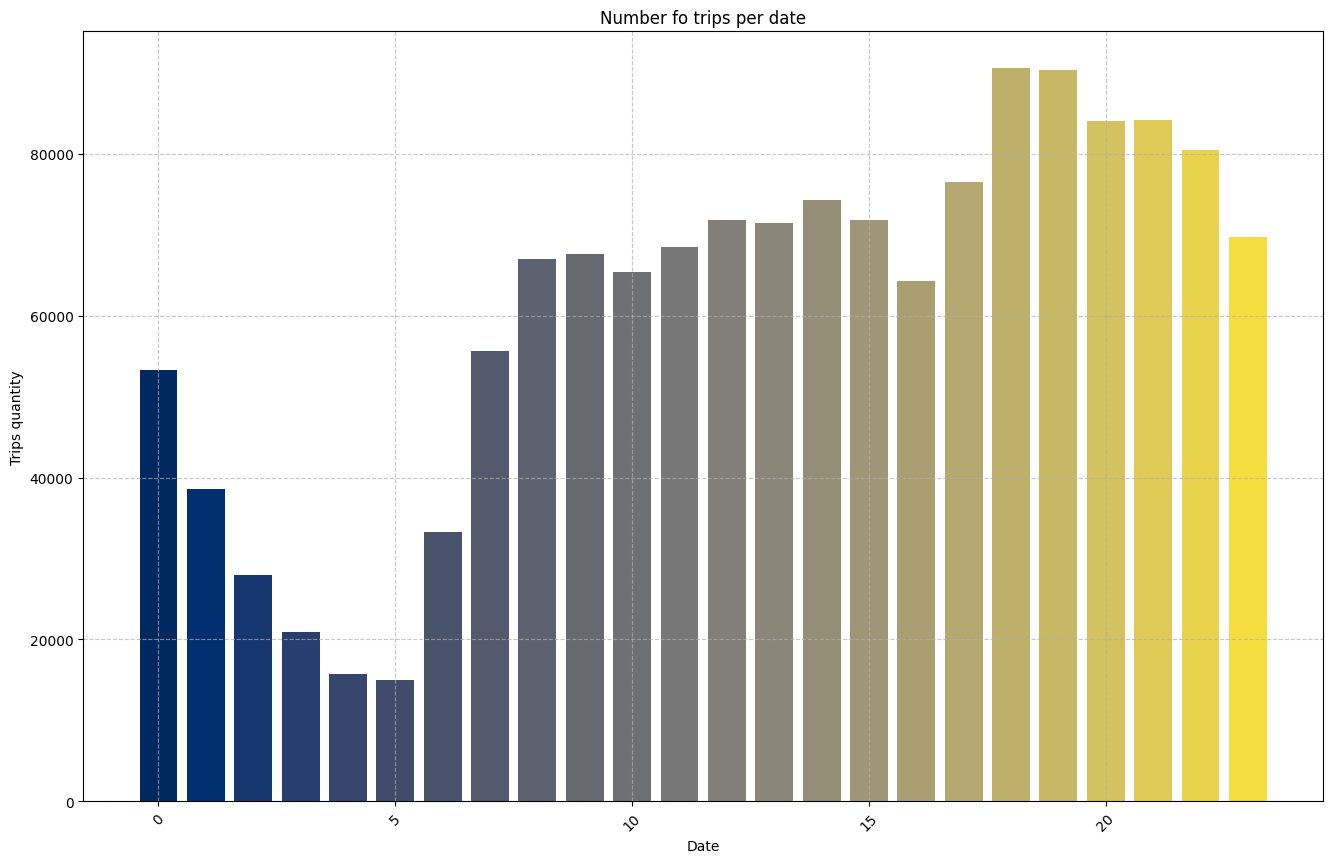

In [13]:
daily_trips = train.groupby(train['pickup_datetime'].dt.hour).size()

plt.bar(daily_trips.index,daily_trips.values, color=sns.color_palette('cividis', len(daily_trips)))
plt.title('Number fo trips per date')
plt.xlabel('Date')
plt.ylabel('Trips quantity')
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, поищите, как это делается). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

In [14]:
train['hour'] = train['pickup_datetime'].dt.hour
train['month'] = train['pickup_datetime'].dt.month
train['day_of_week'] = train['pickup_datetime'].dt.dayofweek

monthly_trips = train.groupby(['month', 'hour']).size().unstack(fill_value=0)

weekly_trips = train.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)

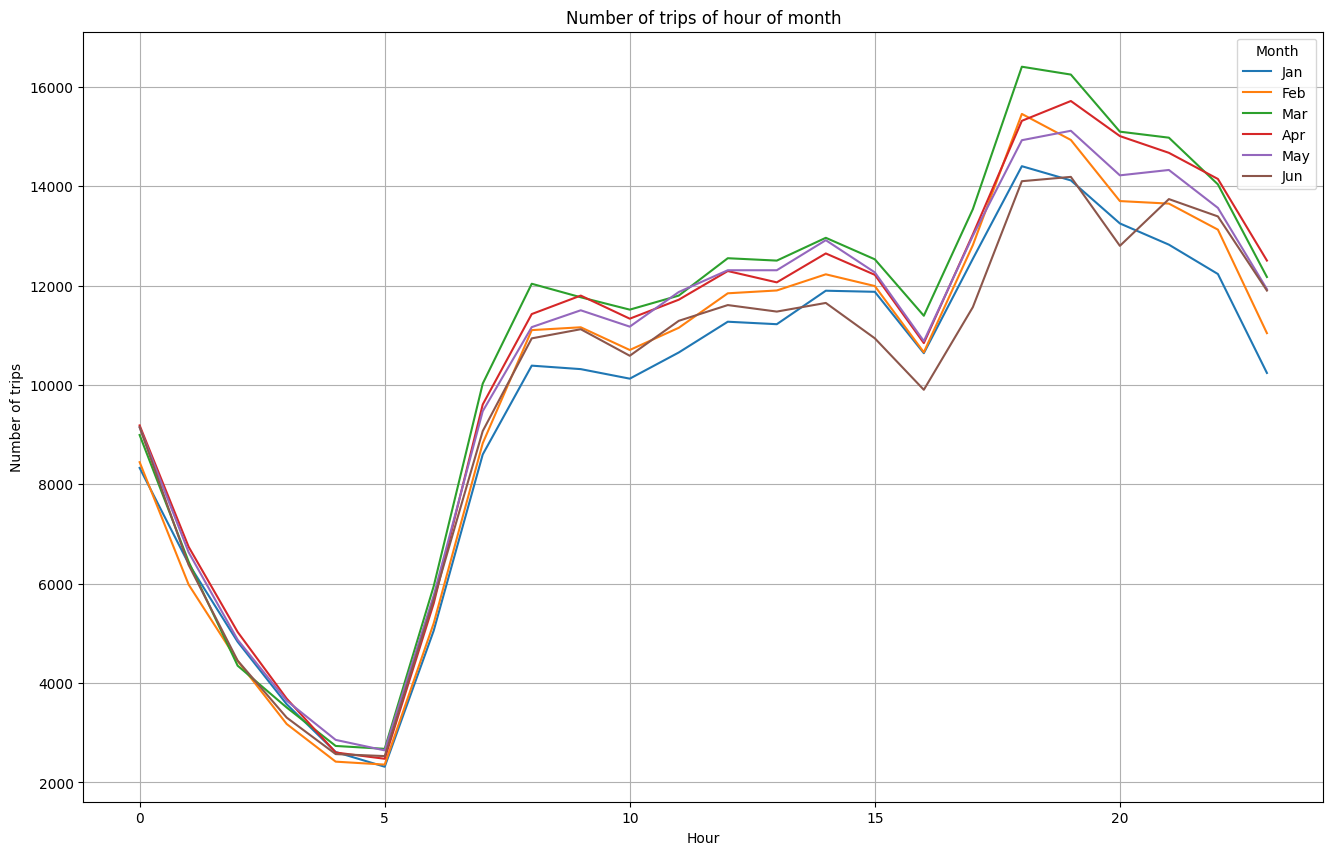

In [15]:
monthes = ['Jan', 'Feb', "Mar", "Apr", "May", "Jun"]
for month in monthly_trips.index:
    plt.plot(monthly_trips.columns, monthly_trips.loc[month], label=f'{monthes[month - 1]}')

plt.title('Number of trips of hour of month')
plt.xlabel('Hour')
plt.ylabel('Number of trips')
plt.legend(title='Month')
plt.grid()
plt.show()

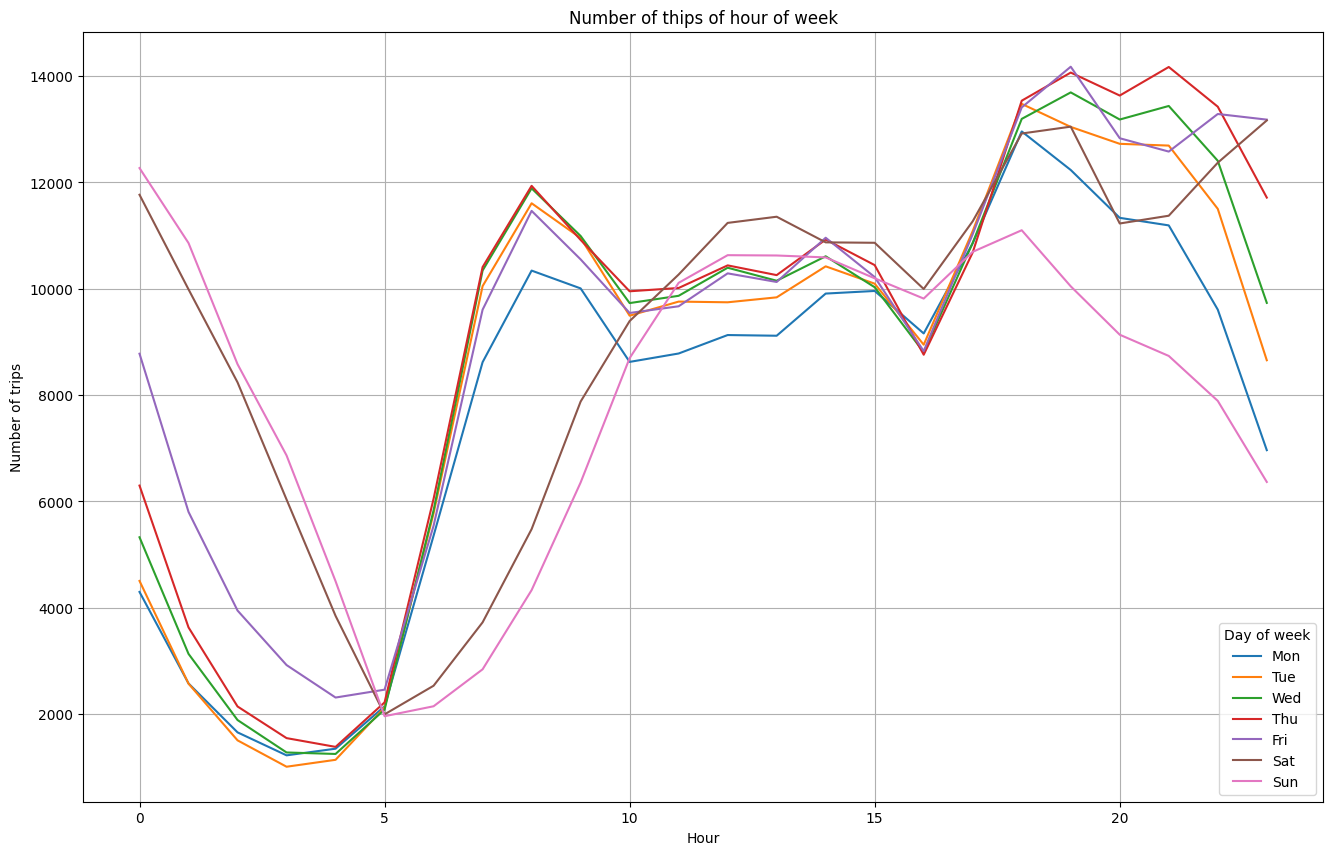

In [16]:
days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
for day in weekly_trips.index:
    plt.plot(weekly_trips.columns, weekly_trips.loc[day], label=f'{days[day]}')

plt.title('Number of thips of hour of week')
plt.xlabel('Hour')
plt.ylabel('Number of trips')
plt.legend(title='Day of week', loc='lower right')
plt.grid()
plt.show()


**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Ответ**: Очевидно выделяется ночное и дневное время суток, а также вечера, когда народ едет на прогулки. Аналогично дни недели, ведь, например, воскресенье и народ сидит дома. Месяца отличаются по сути константой.

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [17]:
from sklearn.model_selection import train_test_split
ttrain, ttest = train_test_split(train, test_size=0.3, random_state=7)

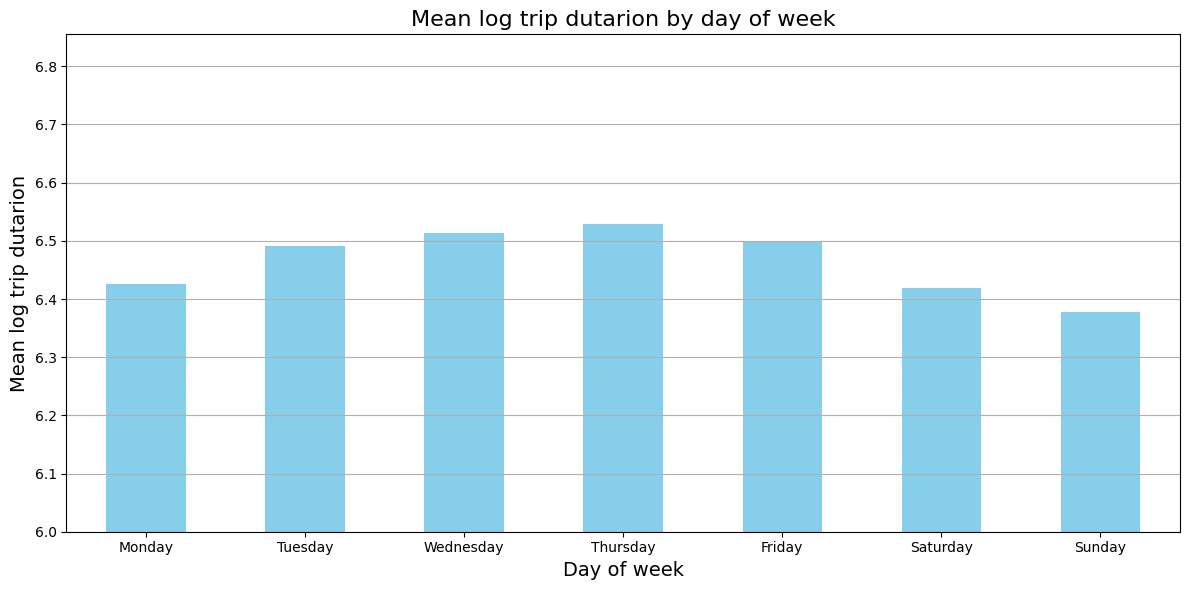

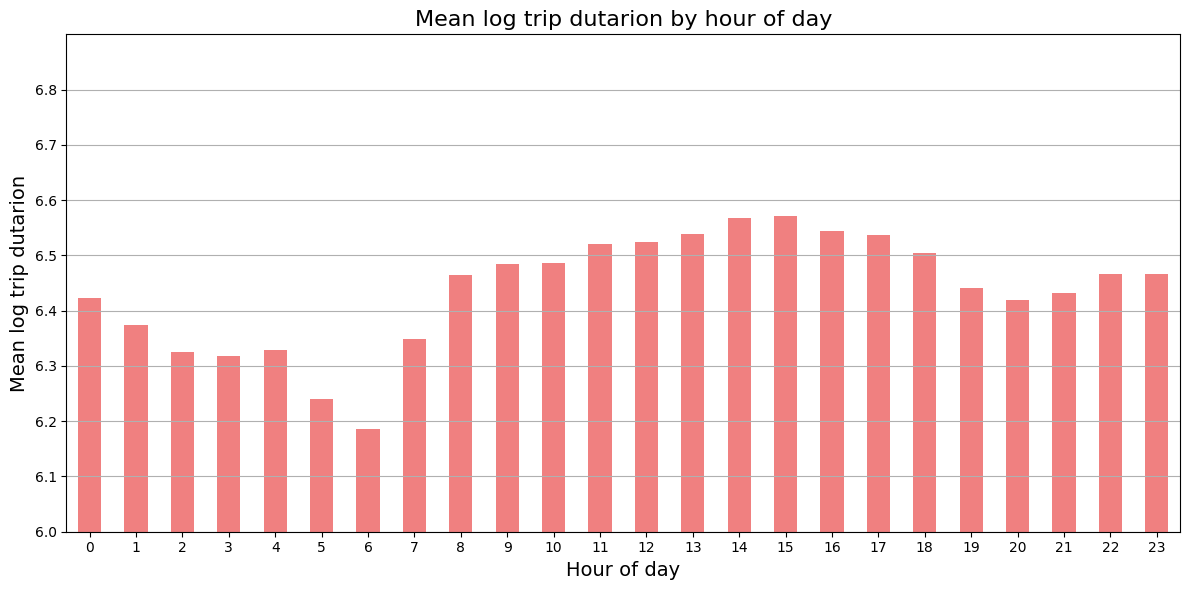

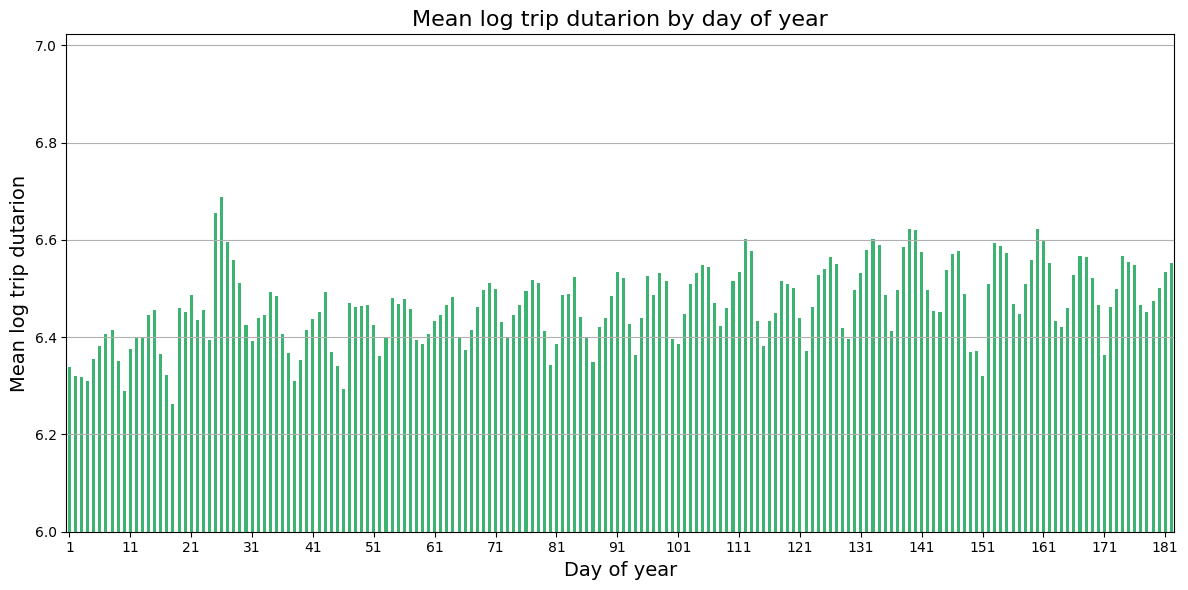

In [18]:
plt.figure(figsize=(12, 6))
train.groupby('day_of_week')['log_trip_duration'].mean().plot(kind='bar', color='skyblue')
plt.title('Mean log trip dutarion by day of week', fontsize=16)
plt.xlabel('Day of week', fontsize=14)
plt.ylabel('Mean log trip dutarion', fontsize=14)
plt.xticks(rotation=0, ticks=np.arange(7), labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.ylim(bottom=6)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
train.groupby('hour')['log_trip_duration'].mean().plot(kind='bar', color='lightcoral')
plt.title('Mean log trip dutarion by hour of day', fontsize=16)
plt.xlabel('Hour of day', fontsize=14)
plt.ylabel('Mean log trip dutarion', fontsize=14)
plt.xticks(rotation=0)
plt.ylim(bottom=6)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

train['day_of_year'] = train['pickup_datetime'].dt.dayofyear
plt.figure(figsize=(12, 6))
train.groupby('day_of_year')['log_trip_duration'].mean().plot(kind='bar', color='mediumseagreen')
plt.title('Mean log trip dutarion by day of year', fontsize=16)
plt.xlabel('Day of year', fontsize=14)
plt.ylabel('Mean log trip dutarion', fontsize=14)
plt.xticks(ticks=np.arange(0, 182, 10), rotation=0)
plt.ylim(bottom=6)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

**Ответ** Угу, похожи, видимо потому, что в датасете мода, медиана и среднее суть одно и то же, а потому выбросы играют не столь большую роль. Средний таргет ожидаемо проседает. Тренда нет, но есть цикличность (по неделям)

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [19]:
#1 2 3 5 added earlier
train['is_blizzard'] = (23<=train['day_of_year']) & (train['day_of_year']<=25)
train['is_fest'] = (150==train['day_of_year'])

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

Все кроме расстояния категориальные, т.к. к ним можно задать вопрос почему, а не сколько (очень эмперическое объяснение, но объективно: мало поездок потому что воскресенье, а не сколько), да и они все дискретны

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [20]:
numeric_features = []
categorical = ['day_of_week', 'month', 'hour', 'day_of_year', 'is_blizzard', 'is_fest']

y = train['log_trip_duration']

if 'log_trip_duration' in train.columns:
  train.drop('log_trip_duration', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.3, random_state=7)

In [21]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import root_mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model1 = pipeline.fit(X_train, y_train)
y_pred = model1.predict(X_test)
y_train_pred = model1.predict(X_train)
print("Test RMSE = %.4f" % root_mean_squared_error(y_test, y_pred))

Test RMSE = 0.7897


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [22]:
from typing import Iterable

def show_circles_on_map(
    latitude_values: Iterable[float],
    longitude_values: Iterable[float],
    color: str = "blue",
) -> folium.Map:
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    Works best on samples of size < 10k, too costly otherwise

    latitude_values: sample latitude values of a dataframe
    longitude_column: sample longitude values of a dataframe
    color: the color of circles to be drawn
    """

    location = (np.mean(latitude_values), np.mean(longitude_values))
    m = folium.Map(location=location)

    for lat, lon in zip(latitude_values, longitude_values):
        folium.Circle(
            radius=100,
            location=(lat, lon),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

Напишите функция, которая вернет значения колонок `pickup_latitude`, `pickup_longitude` на каком-нибудь разумном кусочке датафрейма, например, `df.sample(1000)` и покажите на карте, используя `show_circles_on_map`

In [23]:
sample_t = X_train.sample(1000)
your_lat_values = sample_t['pickup_latitude'].values
your_lon_values = sample_t['pickup_longitude'].values

show_circles_on_map(your_lat_values, your_lon_values, color="midnightblue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

Скопление в самом Манхэттне и в двух аэропортах неподялеку от него (очевидно распределения времени для этих пунктов отличаются, т.к. и расстояние отличаются на порядки)

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [24]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

train.loc[:, 'haversine'] = haversine_array(train['pickup_latitude'], train['pickup_longitude'], train['dropoff_latitude'], train['dropoff_longitude'])

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [25]:
train['log_haversine'] = np.log1p(train['haversine'])

Посчитайте корреляцию и убедитесь, что логарифм расстояния лучше отражает таргет, чем просто расстояние:

In [26]:
assert train['log_haversine'].corr(y) > train['haversine'].corr(y)

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

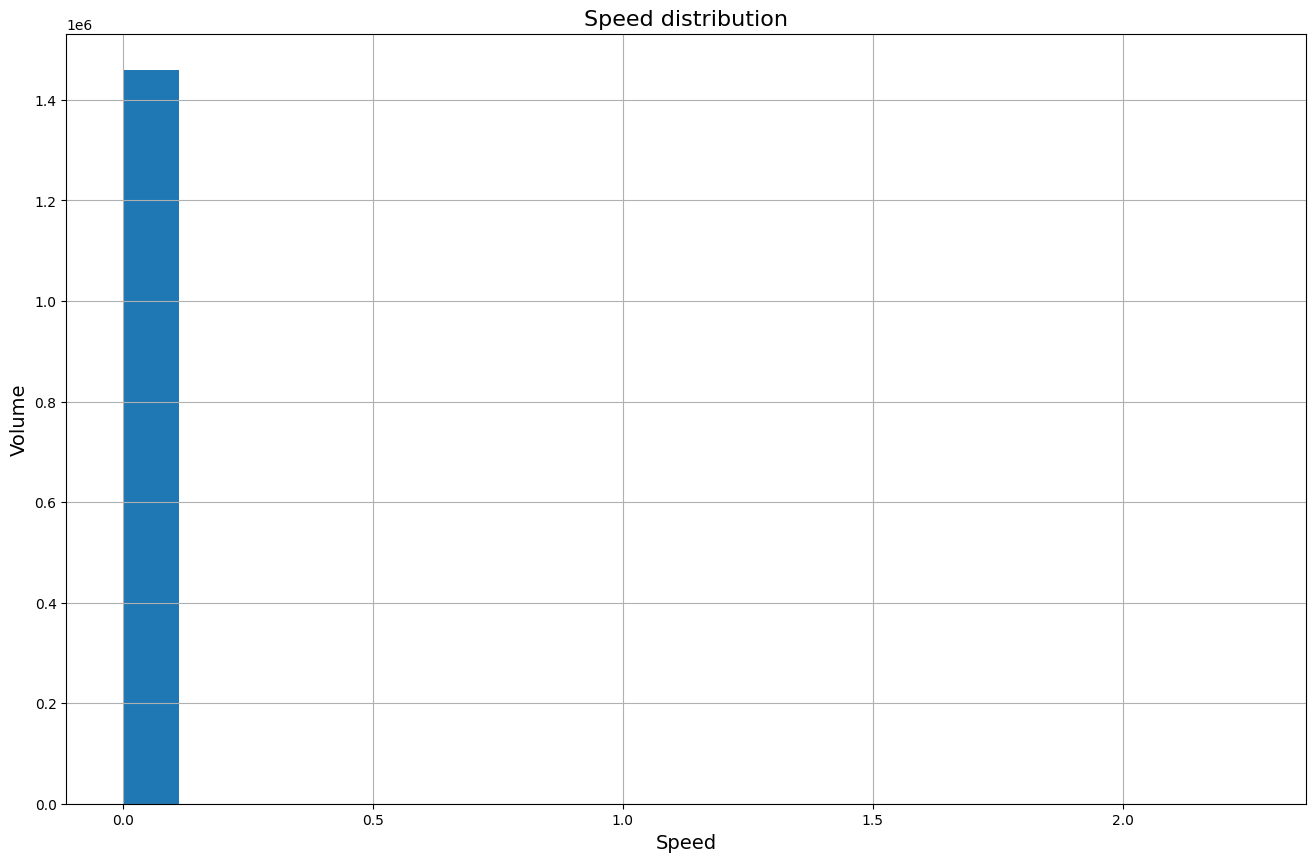

In [27]:
plt.hist(train['haversine'] / np.exp(y), bins=20)
plt.grid()
plt.title('Speed distribution', fontsize=16)
plt.xlabel('Speed', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

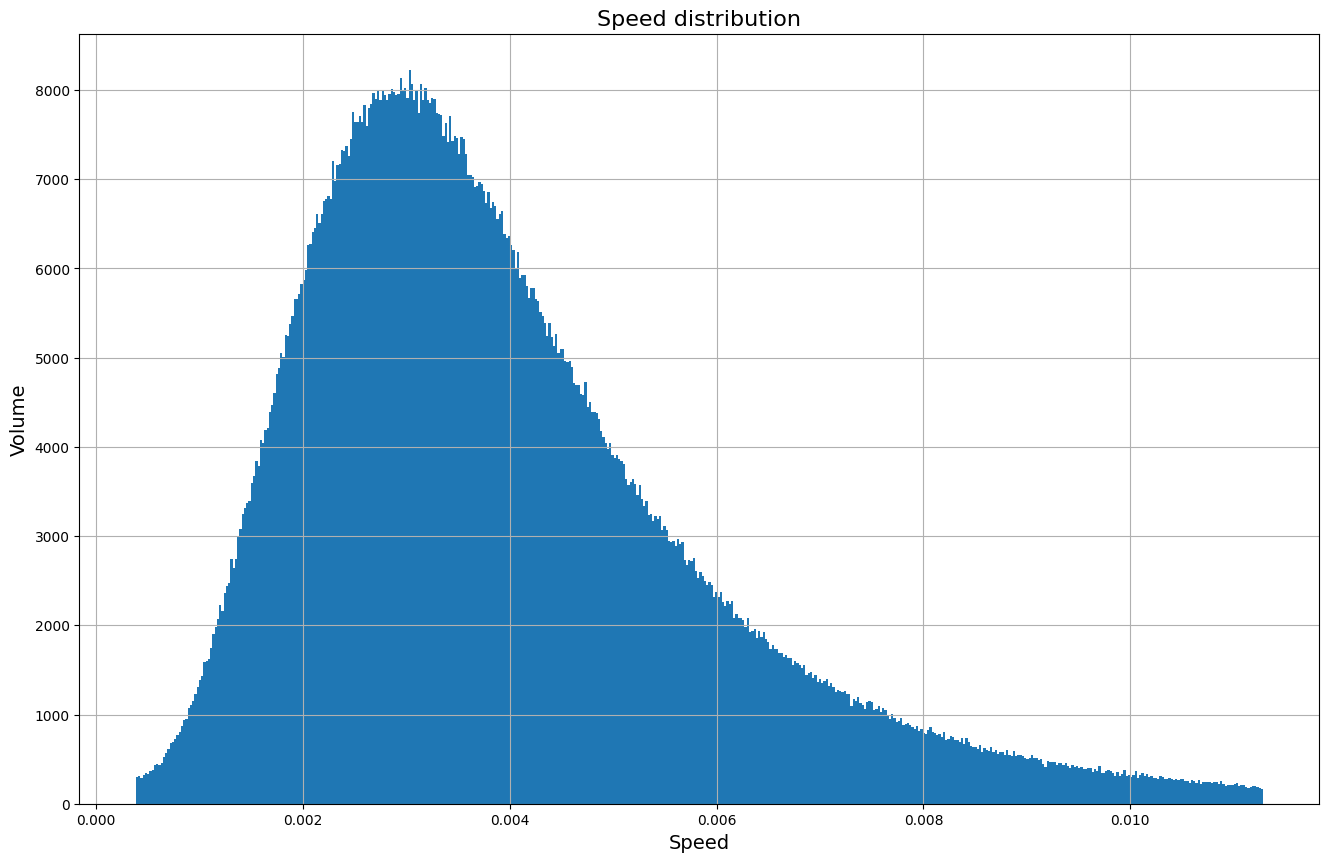

In [28]:
train['speed'] = train['haversine'] / np.exp(y)
high_quant = np.quantile(train['speed'], 0.99)
low_quant = np.quantile(train['speed'], 0.01)
plt.hist(train[(low_quant < train['speed']) & (train['speed'] < high_quant)]['speed'], bins=500)
plt.grid()
plt.title('Speed distribution', fontsize=16)
plt.xlabel('Speed', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте Heatmap-график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

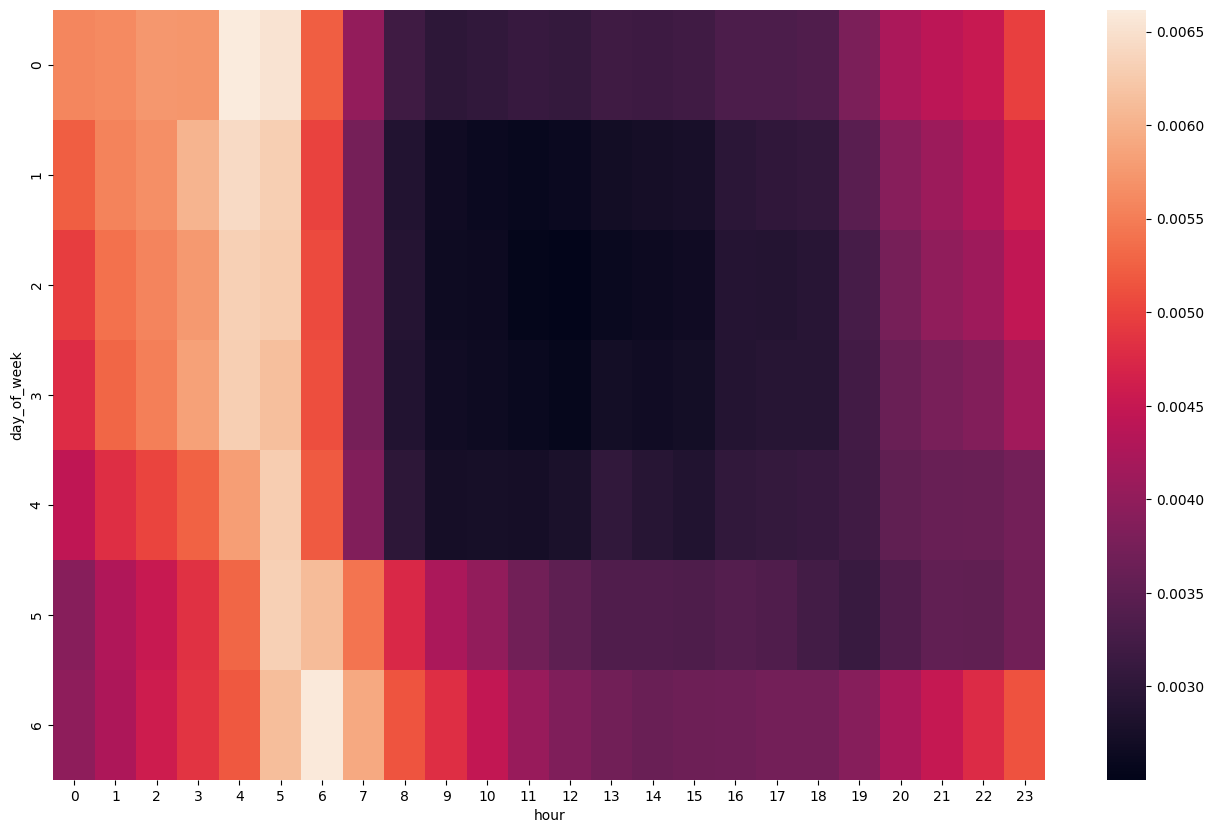

In [29]:
median_speed_by_day_hour = train.groupby(['day_of_week', 'hour'])['speed'].median().unstack()
sns.heatmap(median_speed_by_day_hour)
train.drop(columns=['speed'], inplace=True)

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

На семинаре обсуждалось, что плохо когда есть признаки линейно зависимые от прогнозируемого результата (по сути мы просто кормим результат для его же прогнозирования)

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Все численно написано в коде, но по сути это зависит от того час это пик или же регулярный час.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [32]:
def rush_hour():
  return (train['day_of_week'] > 0) & (train['day_of_week'] < 5) & (train['hour'] > 7) & (train['hour'] < 17)

def free_road():
    return (((train['day_of_week'] >= 0) & (train['day_of_week'] < 5) & (train['hour'] > 3) & (train['hour'] < 6)) |
        ((train['day_of_week'] > 4) & (train['day_of_week'] <= 6) & (train['hour'] > 4) & (train['hour'] < 7)))


train['rush_hour'] = 0
train['free_roads'] = 0
train.loc[rush_hour(), 'rush_hour'] = 1
train.loc[free_road(), 'free_roads'] = 1

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

Как я писал выше, это данные с распределением отличающимся от остальных данных (аномалии). Моя воля я бы вообще их из датасета выкинул, но будь что будет.

In [33]:
JFK = (40.646741, -73.779493)
LaGuardia = (40.777130, -73.873944)
train['jfk_start'] = 0
train['jfk_finish'] = 0
train['la_start'] = 0
train['la_finish'] = 0


def start_hav(airport, dist):
  return haversine_array(train['pickup_latitude'], train['pickup_longitude'], airport[0], airport[1]) < dist

def finish_hav(airport, dist):
  return haversine_array(train['dropoff_latitude'], train['dropoff_longitude'], airport[0], airport[1]) < dist

train.loc[start_hav(JFK, 1.9), 'jfk_start'] = 1
train.loc[finish_hav(JFK, 1.9), 'jfk_finish'] = 1
train.loc[start_hav(LaGuardia, 1.9), 'la_start'] = 1
train.loc[finish_hav(LaGuardia, 1.9), 'la_finish'] = 1


Для каждого из созданных признаков нарисуйте "ящик с усами" (aka boxplot) распределения логарифма времени поездки

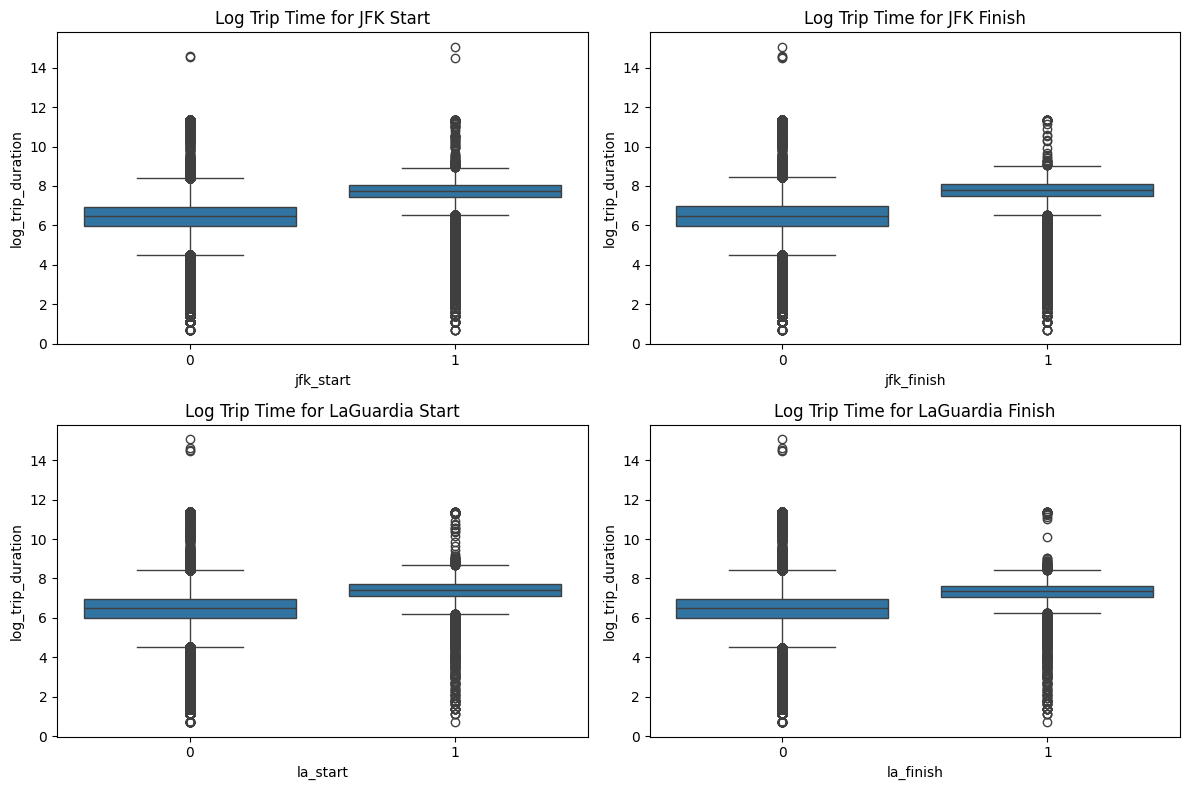

In [34]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x=train['jfk_start'], y=y)
plt.title('Log Trip Time for JFK Start')

plt.subplot(2, 2, 2)
sns.boxplot(x=train['jfk_finish'], y=y)
plt.title('Log Trip Time for JFK Finish')

plt.subplot(2, 2, 3)
sns.boxplot(x=train['la_start'], y=y)
plt.title('Log Trip Time for LaGuardia Start')

plt.subplot(2, 2, 4)
sns.boxplot(x=train['la_finish'], y=y)
plt.title('Log Trip Time for LaGuardia Finish')

plt.tight_layout()
plt.show()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

Ну в принципе, разброс довольно маленький, да и почти без выбросов, потому скорее хорошие.

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [35]:
from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_rows = 10, n_cols = 10):
        self.n_rows = n_rows
        self.n_cols = n_cols
        self.lat_bins = None
        self.lon_bins = None

    def show_map(self):
        map_center = [self.lat_bins.mean(), self.lon_bins.mean()]
        m = folium.Map(location=map_center, zoom_start=12)

        for lat in self.lat_bins:
          for lon in self.lon_bins:
            folium.CircleMarker(
                location=[lat, lon],
                radius=2,
                color='blue',
                fill=True,
                fill_color='blue',
                fill_opacity=0.6,
            ).add_to(m)

        return m

    def fit(self, X=None, y=None):
        lat_min = np.quantile(X['pickup_latitude'], 0.05)
        lat_max = np.quantile(X['pickup_latitude'], 0.991)
        lon_min = np.quantile(X['pickup_longitude'], 0.1)
        lon_max = np.quantile(X['pickup_longitude'], 0.93)

        self.lat_bins = np.linspace(lat_min, lat_max, self.n_rows)
        self.lon_bins = np.linspace(lon_min, lon_max, self.n_cols)

        return self

    def transform(self, X, y=None):
        pickup_lat_idx = np.digitize(X['pickup_latitude'], self.lat_bins) - 1
        pickup_lon_idx = np.digitize(X['pickup_longitude'], self.lon_bins) - 1
        dropoff_lat_idx = np.digitize(X['dropoff_latitude'], self.lat_bins) - 1
        dropoff_lon_idx = np.digitize(X['dropoff_longitude'], self.lon_bins) - 1

        pickup_cells = pickup_lat_idx * self.n_cols + pickup_lon_idx
        dropoff_cells = dropoff_lat_idx * self.n_cols + dropoff_lon_idx

        pickup_cells[(pickup_lat_idx < 0) | (pickup_lat_idx >= self.n_rows) |
                     (pickup_lon_idx < 0) | (pickup_lon_idx >= self.n_cols)] = -1

        dropoff_cells[(dropoff_lat_idx < 0) | (dropoff_lat_idx >= self.n_rows) |
                       (dropoff_lon_idx < 0) | (dropoff_lon_idx >= self.n_cols)] = -1

        X_transformed = X.copy()
        X_transformed['pickup_cell'] = pickup_cells
        X_transformed['dropoff_cell'] = dropoff_cells
        return X_transformed

In [36]:
grid_transformer = MapGridTransformer(n_rows=5, n_cols=5)
grid_transformer.fit(train)
data = grid_transformer.transform(train)
grid_transformer.show_map()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=7)

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [38]:
categorical = ['day_of_week', 'month', 'hour', 'day_of_year', 'is_blizzard', 'is_fest', 'rush_hour', 'free_roads', 'jfk_start', 'jfk_finish', 'la_start', 'la_finish', 'pickup_cell', 'dropoff_cell']
numeric_features = ['log_haversine']

In [39]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model2 = pipeline.fit(X_train, y_train)
y_pred = model2.predict(X_test)
print("Test RMSE = %.4f" % root_mean_squared_error(y_test, y_pred))

Test RMSE = 0.4756


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

**Ответ**: Мало ли вендор коррелирует с индикатором поездки в аэропорт (обычное такси туда не возит). Число пассажиров бесполезно, если только из-за веса такси вынуждено ехать медленнее. Последнее же чисто технический признак о сохранении информации в память, в общем, он совсем бред.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [40]:
data['vendor_id'].value_counts()

,count
vendor_id,
2,780302
1,678342


In [41]:
data['passenger_count'].value_counts()

,count
passenger_count,
1,1033540
2,210318
5,78088
3,59896
6,48333
4,28404
0,60
7,3
9,1


In [42]:
data['store_and_fwd_flag'].value_counts()

,count
store_and_fwd_flag,
N,1450599
Y,8045


Итого 2, 10 и снова 2 уникальных.

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

Text(0.5, 1.0, 'Passenger count')

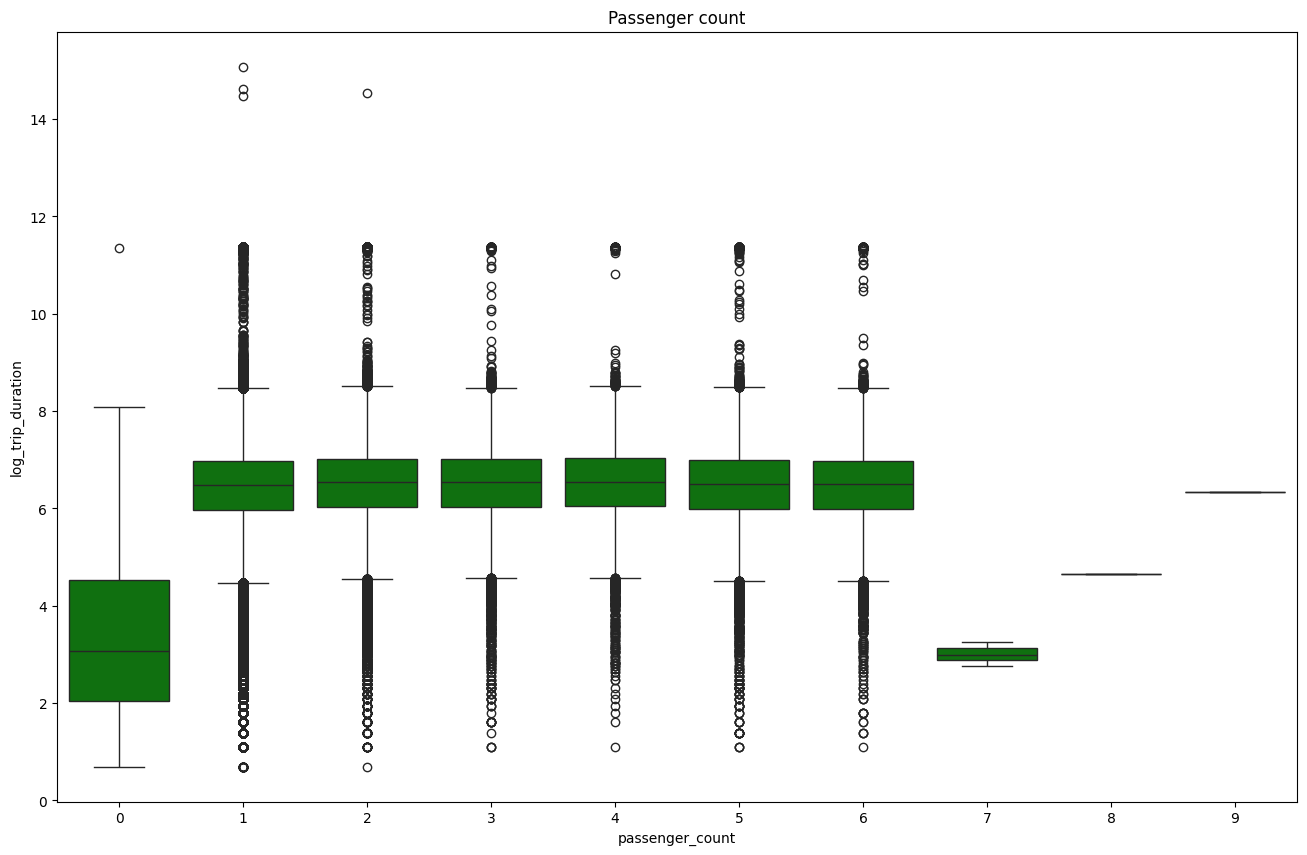

In [43]:
sns.boxplot(x=data['passenger_count'], y=y, color='green')
plt.title('Passenger count')

Text(0.5, 1.0, 'Vendor_id (left) and Store_and_fwd_flag (right)')

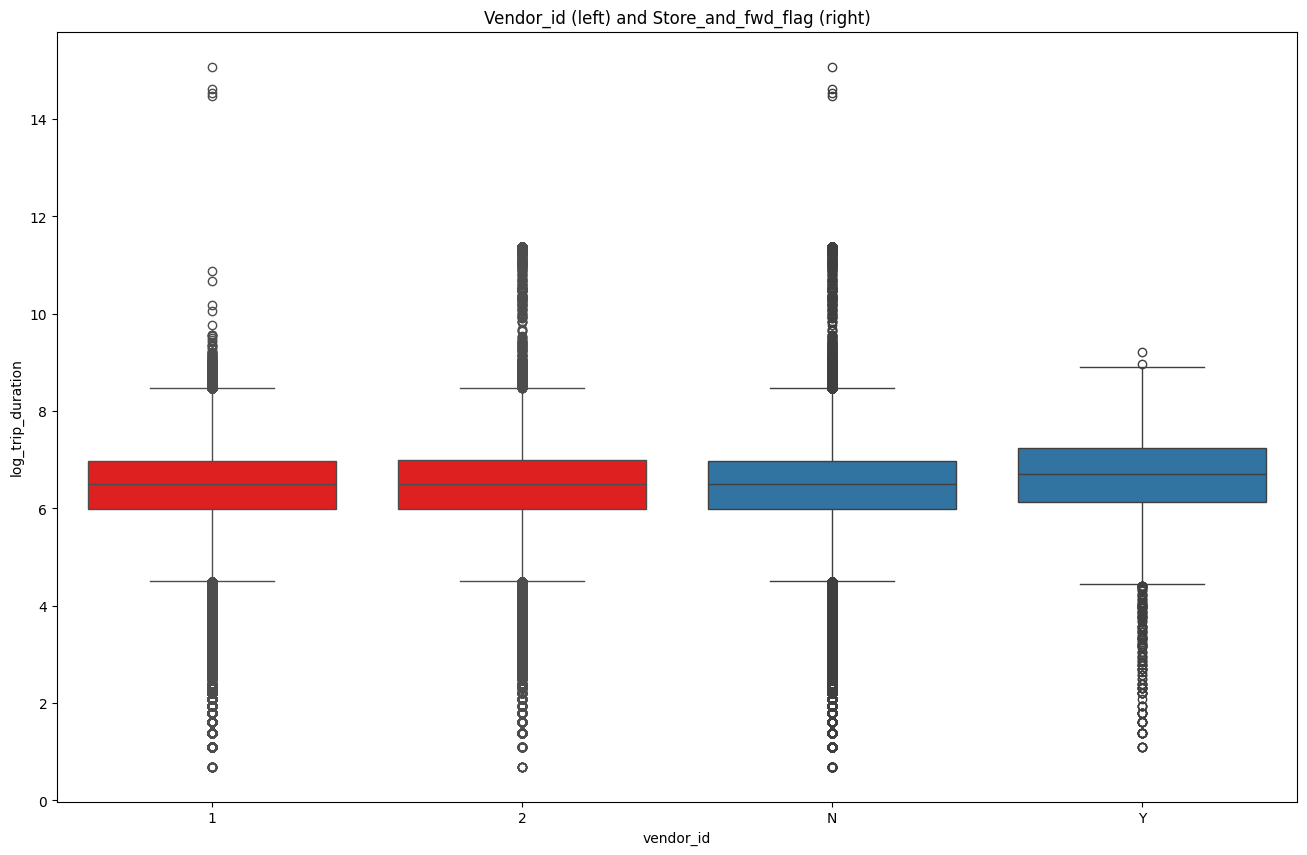

In [44]:
sns.boxplot(x=data['vendor_id'], y=y, color='red')
sns.boxplot(x=data['store_and_fwd_flag'], y=y)
plt.title('Vendor_id (left) and Store_and_fwd_flag (right)')

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [45]:
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].replace({'N':0, 'Y':1})
data['vendor_id'] = data['vendor_id'].replace({1:0, 2:1})

<ipython-input-45-5b25f74214fb>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['store_and_fwd_flag'] = data['store_and_fwd_flag'].replace({'N':0, 'Y':1})


**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

Они вероятно будут бесполезными, т.к. разброс дикий.

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=7)
categorical = ['day_of_week', 'month', 'hour', 'day_of_year', 'is_blizzard', 'is_fest', 'rush_hour', 'free_roads', 'jfk_start', 'jfk_finish', 'la_start', 'la_finish', 'pickup_cell', 'dropoff_cell', 'vendor_id', 'store_and_fwd_flag', 'passenger_count']
numeric_features = ['log_haversine']

In [47]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model3 = pipeline.fit(X_train, y_train)
y_pred = model3.predict(X_test)
print("Test RMSE = %.4f" % root_mean_squared_error(y_test, y_pred))

Test RMSE = 0.4750


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

In [48]:
data.drop(columns=['vendor_id', 'store_and_fwd_flag', 'passenger_count'], inplace=True)

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

In [49]:
train_x = pd.concat([X_train, y_train], axis=1)
train_x['residual'] = np.sqrt(np.abs(model2.predict(train_x)**2 - y_train**2))

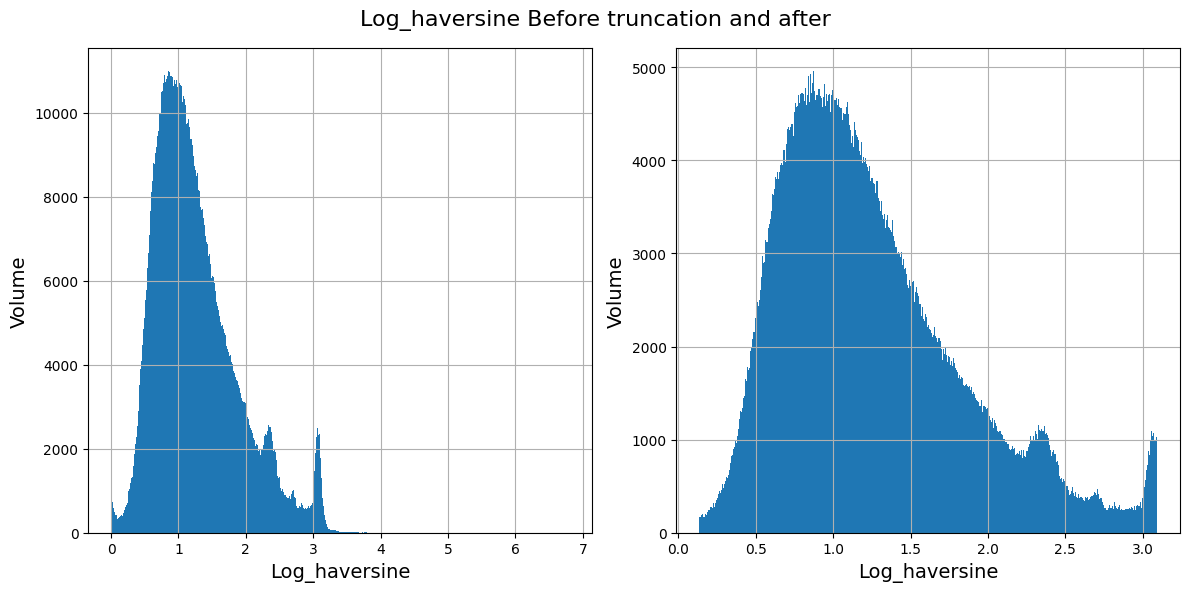

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].hist(train_x['log_haversine'], bins=500)
axs[0].grid()
axs[0].set_xlabel('Log_haversine', fontsize=14)
axs[0].set_ylabel('Volume', fontsize=14)

high_quant1 = np.quantile(train_x['log_haversine'], 0.992)
low_quant1 = np.quantile(train_x['log_haversine'], 0.01)

axs[1].hist(train_x[(low_quant1 < train_x['log_haversine']) & (train_x['log_haversine'] < high_quant1)]['log_haversine'], bins=500)
axs[1].grid()
axs[1].set_xlabel('Log_haversine', fontsize=14)
axs[1].set_ylabel('Volume', fontsize=14)

plt.suptitle('Log_haversine Before truncation and after', fontsize=16)

plt.tight_layout()
plt.show()


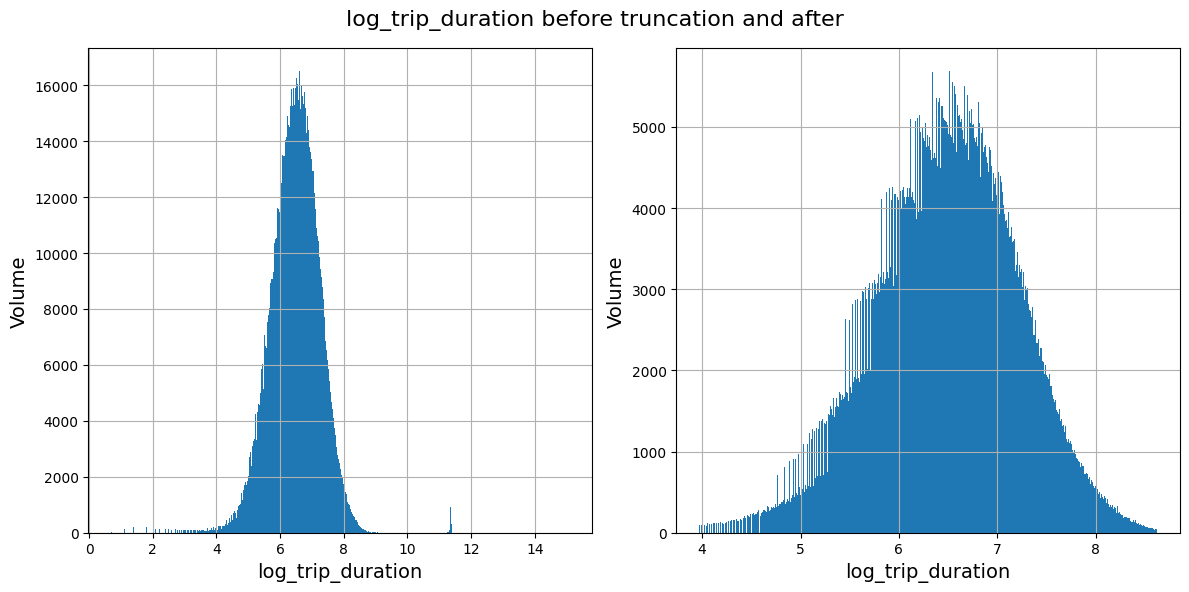

In [51]:
fig, axs = plt.subplots(1, 2, figsize=(12,6))
axs[0].hist(train_x['log_trip_duration'], bins=500)
axs[0].grid()
axs[0].set_xlabel('log_trip_duration', fontsize=14)
axs[0].set_ylabel('Volume', fontsize=14)

high_quant2 = np.quantile(train_x['log_trip_duration'], 0.998)
low_quant2 = np.quantile(train_x['log_trip_duration'], 0.005)
axs[1].hist(train_x[(low_quant2 < train_x['log_trip_duration']) & (train_x['log_trip_duration'] < high_quant2)]['log_trip_duration'], bins=500)
axs[1].grid()
axs[1].set_xlabel('log_trip_duration', fontsize=14)
axs[1].set_ylabel('Volume', fontsize=14)

plt.suptitle('log_trip_duration before truncation and after', fontsize=16)
plt.tight_layout()
plt.show()

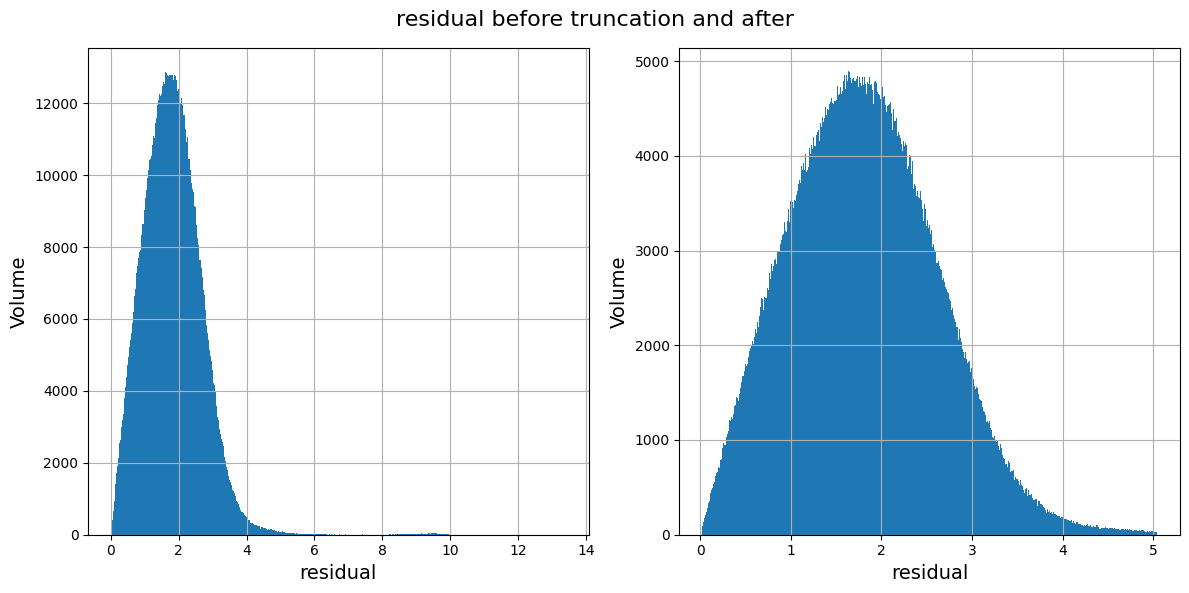

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(12,6))
axs[0].hist(train_x['residual'], bins=500)
axs[0].grid()
axs[0].set_xlabel('residual', fontsize=14)
axs[0].set_ylabel('Volume', fontsize=14)

high_quant3 = np.quantile(train_x['residual'], 0.997)
low_quant3 = np.quantile(train_x['residual'], 0.0001)
axs[1].hist(train_x[(low_quant3 < train_x['residual']) & (train_x['residual'] < high_quant3)]['residual'], bins=500)
axs[1].grid()
axs[1].set_xlabel('residual', fontsize=14)
axs[1].set_ylabel('Volume', fontsize=14)

plt.suptitle('residual before truncation and after', fontsize=16)
plt.tight_layout()
plt.show()

In [53]:
train_x = train_x[(low_quant1 < train_x['log_haversine']) & (train_x['log_haversine'] < high_quant1)]
train_x = train_x[(low_quant2 < train_x['log_trip_duration']) & (train_x['log_trip_duration'] < high_quant2)]
train_x = train_x[(low_quant3 < train_x['residual']) & (train_x['residual'] < high_quant3)]

In [55]:
if 'log_trip_duration' in train_x.columns:
  y_train = train_x['log_trip_duration']
  train_x.drop('log_trip_duration', inplace=True)

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

In [57]:
for col in ['is_blizzard', 'is_fest', 'rush_hour', 'free_roads', 'jfk_start', 'jfk_finish', 'la_start', 'la_finish', 'pickup_cell', 'dropoff_cell']:
  print(col, "=", train_x[col].sum())

is_blizzard = 7642
is_fest = 4408
rush_hour = 252633
free_roads = 18176
jfk_start = 16046
jfk_finish = 5517
la_start = 25636
la_finish = 12641
pickup_cell = 7403742
dropoff_cell = 7672280


Я не согласен с этой логикой про переобучение. Т.к. у нас линейная модель, то 0 значение не сыграет никакой роли, да и в таком случае зачем вобще было про аэропорты добавлять. Чтобы хоть что-то смерджить давайте займемся праздниками и снегопадом (если смерджить аэропорты качество падает, по сравнению с не мерджить)

In [58]:
train_x['is_anom'] = train_x['is_blizzard'] | train_x['is_fest']
X_test['is_anom'] = X_test['is_blizzard'] | X_test['is_fest']

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [59]:
categorical = ['day_of_week', 'month', 'hour', 'day_of_year', 'is_anom', 'rush_hour', 'free_roads', 'jfk_start', 'jfk_finish', 'la_start', 'la_finish', 'pickup_cell', 'dropoff_cell']
numeric_features = ['log_haversine']

In [60]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model4 = pipeline.fit(train_x, y_train)
y_pred = model4.predict(X_test)
print("Test RMSE = %.4f" % root_mean_squared_error(y_test, y_pred))

Test RMSE = 0.4759


Видим, что после чистки качество немного изменилось в меньшую сторону (видимо в тест попали выбросы), но возможно в будущем нам это поможет.

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [61]:
print("Before encodeing", train_x.shape[1])
print("After encoding", column_transformer.transform(train_x).shape[1])

Before encodeing 27
After encoding 283


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [62]:
from sklearn.linear_model import Lasso
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model5 = pipeline.fit(train_x, y_train)
y_pred = model5.predict(X_test)
print("Test RMSE = %.4f" % root_mean_squared_error(y_test, y_pred))

Test RMSE = 0.7975


Ridge однозначно лучше, посмотрим почему

Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [63]:
train_las, test_las, y_train_las, y_test_las = train_test_split(train_x, y_train, test_size=0.2, random_state=7)

In [64]:
from sklearn.model_selection import GridSearchCV

ridge_params = {'alpha': np.logspace(-3, 1, 10)}
ridge_model = Ridge()

ridge_grid = GridSearchCV(ridge_model, ridge_params, scoring='neg_mean_squared_error', cv=5)
pipeline_ridge = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('cross_validation', ridge_grid)
])
pipeline_ridge.fit(test_las, y_test_las)


lasso_params = {'alpha': np.logspace(-4, 1, 10)}
lasso_model = Lasso()

zero_weight = []
lasso_grid = GridSearchCV(lasso_model, lasso_params, scoring='neg_mean_squared_error', cv=5)
pipeline_lasso = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('cross_validation', lasso_grid)
])
pipeline_lasso.fit(test_las, y_test_las)

Pipeline(steps=[('ohe_and_scaling',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['day_of_week', 'month',
                                                   'hour', 'day_of_year',
                                                   'is_anom', 'rush_hour',
                                                   'free_roads', 'jfk_start',
                                                   'jfk_finish', 'la_start',
                                                   'la_finish', 'pickup_cell',
                                                   'dropoff_cell']),
                                                 ('scaling', StandardScaler(),
                                                  ['log_haversine'])])),
                ('cross_validation',
                 GridSearchCV(cv=5, estimator=Lasso(),
                              param_grid={'alpha': array([1.00000000e-04, 3.59381366e-04, 1.29154967e-03, 4.64158883e-03,
       1.66810054e-02, 5.99484250e-02, 2.15443469e-01, 7.74263683e-01,
       2.78255940e+00, 1.00000000e+01])},
                              scoring='neg_mean_squared_error'))])

In [65]:
best_ridge_model = ridge_grid.best_estimator_
pipeline_ridge = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', best_ridge_model)
])
model_ridge = pipeline_ridge.fit(train_las, y_train_las)
ridge_val_pred = model_ridge.predict(X_test)
ridge_val_mse = root_mean_squared_error(y_test, ridge_val_pred)

best_lasso_model = lasso_grid.best_estimator_
pipeline_lasso = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', best_lasso_model)
])
model_lasso = pipeline_lasso.fit(train_las, y_train_las)
lasso_val_pred = model_lasso.predict(X_test)
lasso_val_mse = root_mean_squared_error(y_test, lasso_val_pred)

print(f'Best Ridge alpha: {ridge_grid.best_params_["alpha"]}, MSE validation: {ridge_val_mse}')
print(f'Best Lasso alpha: {lasso_grid.best_params_["alpha"]}, MSE validation: {lasso_val_mse}')


Best Ridge alpha: 10.0, MSE validation: 0.4758807864910347
Best Lasso alpha: 0.0001, MSE validation: 0.4762504745465159


Сохраните наилучшее значение, как бенчмарк на будущее

In [66]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
best_rmsle = ridge_val_mse

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

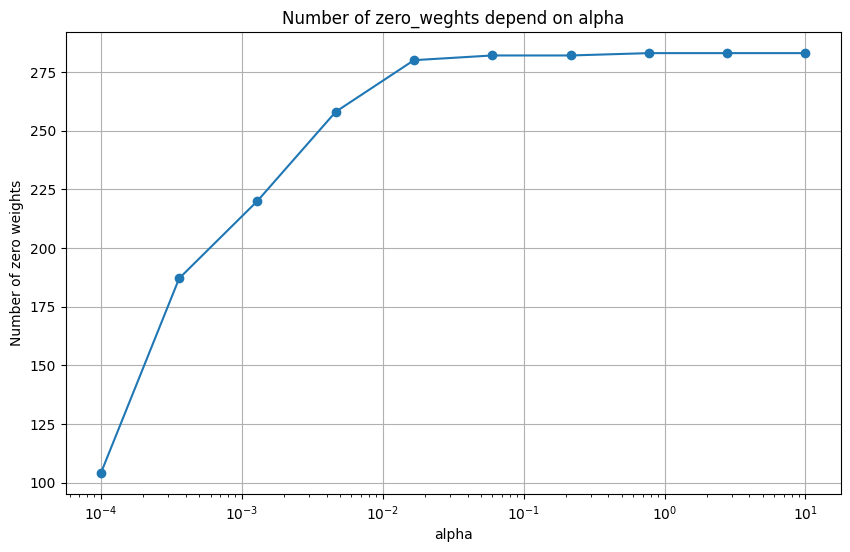

In [67]:
zero_weights_count = []
alphas = lasso_grid.cv_results_['param_alpha'].data

for alpha in alphas:
    pipeline_lasso = Pipeline(steps=[
        ('ohe_and_scaling', column_transformer),
        ('regression', Lasso(alpha=alpha))
    ])
    mod = pipeline_lasso.fit(train_las, y_train_las)
    lasso_model = pipeline_lasso.named_steps['regression']
    zero_weights_count.append(np.sum(lasso_model.coef_ == 0))

plt.figure(figsize=(10, 6))
plt.plot(alphas, zero_weights_count, marker='o')
plt.xscale('log')
plt.title('Number of zero_weghts depend on alpha')
plt.xlabel('alpha')
plt.ylabel('Number of zero weights')
plt.grid()
plt.show()

In [68]:
pipeline_lasso = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(alpha=0.0002))
])
mod1 = pipeline_lasso.fit(train_x, y_train)
y_pred1 = mod1.predict(X_test)
print("Test RMSE = %.4f" % root_mean_squared_error(y_test, y_pred1))

y_pred = model4.predict(X_test)
print("Test RMSE old = %.4f" % root_mean_squared_error(y_test, y_pred))

Test RMSE = 0.4768
Test RMSE old = 0.4759


Как мы видим, разница по сути в десятитысячных частях (0.009 to be precise), что не столь много для наших целей (alpha=0.0002 взято если посмотреть на график)

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

Модель линейная, а мы таким образом как бы расширяем гиперпространство признаков, добавляя кросс-признак, т.е. раньше возможно она могла двигать значения по началу и концу как ей вздумается, а теперь ограничится.

In [69]:
train_x['cell_pair'] = list(zip(train_x['pickup_cell'], train_x['dropoff_cell']))
pair_counts = train_x['cell_pair'].value_counts()

In [70]:
top_100_pairs = pair_counts.nlargest(100).index.tolist()

In [71]:
train_x['cell_pair'] = -1
X_test['cell_pair'] = -1

for ind, pair in enumerate(top_100_pairs):
  train_x.loc[(train_x['pickup_cell'] == pair[0]) & (train_x['dropoff_cell'] == pair[1]), 'cell_pair'] = ind
  X_test.loc[(X_test['pickup_cell'] == pair[0]) & (X_test['dropoff_cell'] == pair[1]), 'cell_pair'] = ind

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [72]:
categorical = ['day_of_week', 'month', 'hour', 'day_of_year', 'is_anom', 'rush_hour', 'free_roads', 'jfk_start', 'jfk_finish', 'la_start', 'la_finish', 'pickup_cell', 'dropoff_cell', 'cell_pair']
numeric_features = ['log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(alpha=10))
])

model5 = pipeline.fit(train_x, y_train)
y_pred = model5.predict(X_test)
print("Test RMSE = %.4f" % root_mean_squared_error(y_test, y_pred))

Test RMSE = 0.4643


**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

In [73]:
new_y = np.array([[40.749815, -73.987752], [40.751710, -73.986381]])
new_x = np.array([[40.749815, -73.987752], [40.748868, -73.985542]])
center = np.array([40.749815, -73.987752])
y_new = new_y[1] - center
x_new = new_x[1] - center

In [74]:
def scalar_product(point):
  point_new = np.array([point[0] - center[0], point[1] - center[1]])
  proj_x = np.dot(x_new, point_new) / np.dot(x_new, x_new)
  proj_y = np.dot(y_new, point_new) / np.dot(y_new, y_new)
  return np.array([proj_x, proj_y])

In [75]:
def man_dist(start0, start1, finish0, finish1):
  start = np.array([start0, start1])
  finish = np.array([finish0, finish1])
  vec = scalar_product(finish) - scalar_product(start)
  return abs(vec[0]) + abs(vec[1])


In [76]:
train_x['manhattan'] = man_dist(train_x['pickup_latitude'], train_x['pickup_longitude'], train_x['dropoff_latitude'], train_x['dropoff_longitude'])
train_x['log_manhattan'] = np.log1p(train_x['manhattan'])

X_test['manhattan'] = man_dist(X_test['pickup_latitude'], X_test['pickup_longitude'], X_test['dropoff_latitude'], X_test['dropoff_longitude'])
X_test['log_manhattan'] = np.log1p(X_test['manhattan'])

In [77]:
print(train_x['log_manhattan'].corr(train_x['log_haversine']))
print(train_x['log_manhattan'].corr(y_train))
print(train_x['log_haversine'].corr(y_train))

0.9671462225279241
0.785487323132276
0.7800863701383767


Корреляция с манхэттенским чуть выше

In [78]:
m = folium.Map(location=(40.749815, -73.987752), zoom_start=14)
folium.PolyLine(new_y, weight=10).add_to(m)
folium.PolyLine(new_x, weight=10).add_to(m)
m

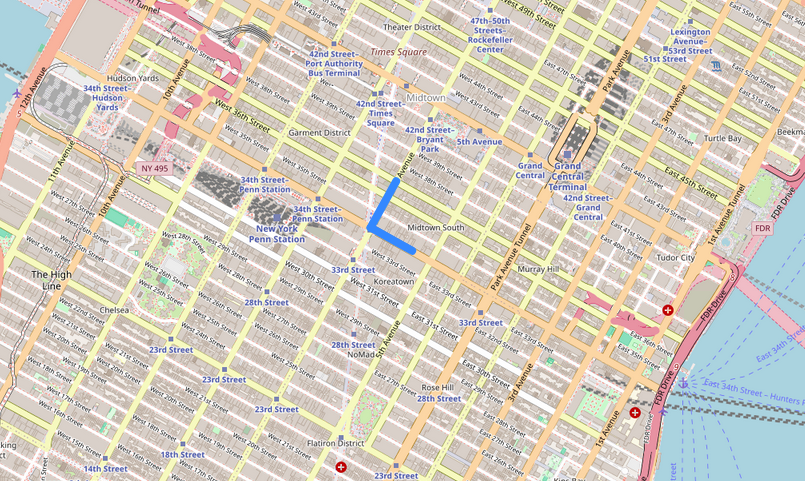

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [79]:
categorical = ['day_of_week', 'month', 'hour', 'day_of_year', 'is_anom', 'rush_hour', 'free_roads', 'jfk_start', 'jfk_finish', 'la_start', 'la_finish', 'pickup_cell', 'dropoff_cell', 'cell_pair']
numeric_features = ['log_manhattan', 'log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(alpha=0.05))
])

model6 = pipeline.fit(train_x, y_train)
y_pred = model6.predict(X_test)
print("Test RMSE = %.4f" % root_mean_squared_error(y_test, y_pred))
print((best_rmsle - root_mean_squared_error(y_test, y_pred)) / 0.005)

Test RMSE = 0.4585
3.4774173420394905


Да, определенно стало лучше. Связано это с тем, что такси так-то ездят не по геодезическим, а по авеню. Потому расстояние рассчитанное как (по-сути) поворот и растяжение в декартовы координаты есть более справедливая оценка.

**Задание 17 (бонус, 2 балла)**.

Разумеется, погружаться в feature engineering можно ещё очень долго. Ваша задача - придумать какие-то новые признаки, которые сделают модель ещё лучше!! За улучшение функционала ошибки на каждые 0.005 на тестовой выборке относительно `best_rmsle` будет даваться 0.5 бонусных балла. Всего за этот пункт можно получить до 2 бонусных баллов.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Какие могут быть идеи для вдохновения:

1. Трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения, по аналогии с квадратной сеткой  
> Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.    

2. Мы пока что никак не использовали историчность и взаимосвязь в данных, хотя информация о том, что было ранее в эти/похожие дни тоже может пригодиться. Попробуйте поискать соседей и/или построить агрегации, например, при помощи groupby, посчитайте какие-либо статистики в пределах какого-то окна (подберите всё это сами, постарайтесь, чтобы это было что-то разумное), и присоедините к основному датафрейму
> Важно: учтите, что разных вариантов агрегаций и статистик существует очень много. Не стесняйтесь выкидывать фичи, которые вам не нравятся (помните про свойство Lasso), используйте эффективные способы хранения данных ([wink](https://www.kaggle.com/code/demche/polars-memory-usage-optimization)-[wink](https://docs.scipy.org/doc/scipy/reference/sparse.html))

3. В конце концов можно использовать альтернативные способы преобразования данных. Например, использовать другой scaler, другую кодировку категориальных фичей, другие гиперпараметры и пр. Но помните, что на данный момент мы ограничены только `Ridge` и `Lasso`

In [80]:
!pip install h3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 11.8 MB/s eta 0:00:00


In [81]:
import h3

In [82]:
train_x['h3_pick'] = train_x.apply(lambda row: h3.latlng_to_cell(row['pickup_latitude'], row['pickup_longitude'], 8), axis=1)
train_x['h3_drop'] = train_x.apply(lambda row: h3.latlng_to_cell(row['dropoff_latitude'], row['dropoff_longitude'], 8), axis=1)

X_test['h3_pick'] = X_test.apply(lambda row: h3.latlng_to_cell(row['pickup_latitude'], row['pickup_longitude'], 8), axis=1)
X_test['h3_drop'] = X_test.apply(lambda row: h3.latlng_to_cell(row['dropoff_latitude'], row['dropoff_longitude'], 8), axis=1)

In [83]:
train_x['h3_dist'] = train_x.apply(lambda row: h3.grid_distance(row['h3_pick'], row['h3_drop']), axis=1)

X_test['h3_dist'] = X_test.apply(lambda row: h3.grid_distance(row['h3_pick'], row['h3_drop']), axis=1)

In [84]:
# !pip install category_encoders

In [85]:
from sklearn.preprocessing import RobustScaler

In [86]:
categorical = ['day_of_week', 'month', 'hour', 'day_of_year', 'is_anom', 'rush_hour', 'free_roads', 'jfk_start', 'jfk_finish', 'la_start', 'la_finish', 'pickup_cell', 'dropoff_cell', 'cell_pair', 'h3_dist']
numeric_features = ['log_haversine', 'log_manhattan']

In [ ]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(alpha=0.0001))
])

model7 = pipeline.fit(train_x, y_train)
y_pred = model7.predict(X_test)
print("Test RMSE = %.4f" % root_mean_squared_error(y_test, y_pred))

Test RMSE = 0.4557


In [87]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', RobustScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(alpha=10))
])

model8 = pipeline.fit(train_x, y_train)
y_pred = model8.predict(X_test)
print("Test RMSE = %.4f" % root_mean_squared_error(y_test, y_pred))
print((best_rmsle - root_mean_squared_error(y_test, y_pred)) / 0.005)

Test RMSE = 0.4553
4.109735037435136


Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.

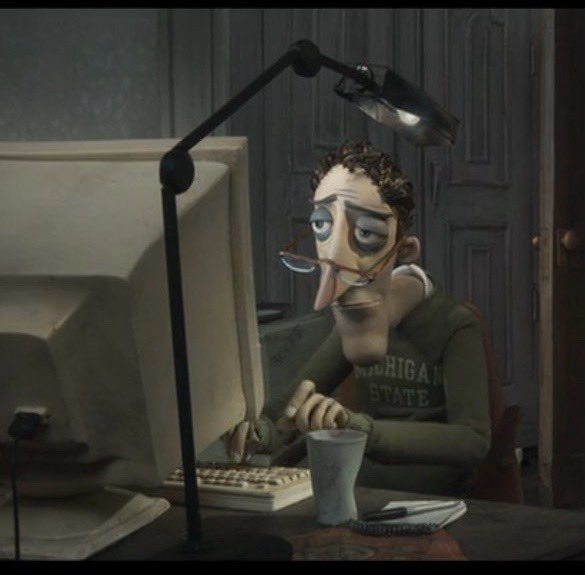